<a href="https://colab.research.google.com/github/cdiegor/Simulacao/blob/main/Pr%C3%A1tica_1_Gerador_de_n%C3%BAmeros_aleat%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

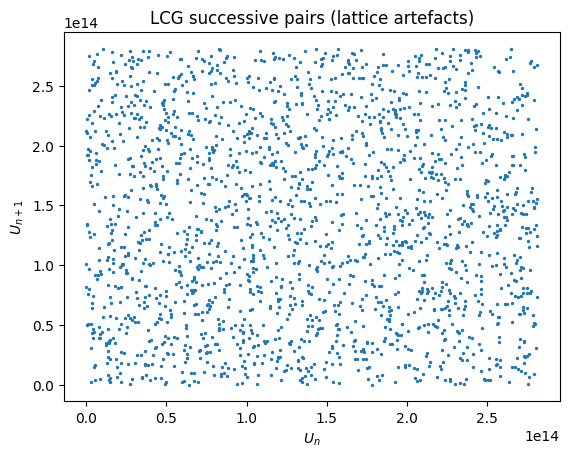

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LCG:
    def __init__(self, seed=25):
        self.m = 2**48
        self.a = 25214903917
        self.c = 11
        self.x = seed % self.m
    def random(self):
        self.x = (self.a * self.x + self.c) % self.m
        return self.x
    def random_array(self, n):
        out = np.empty(n)
        for i in range(n):
            out[i] = self.random()
        return out

# Visualize lattice artefacts via successive pairs
rng = LCG(42)
U = rng.random_array(2000)
plt.figure()
plt.scatter(U[:-1], U[1:], s=2, alpha=1)
plt.xlabel(r"$U_n$")
plt.ylabel(r"$U_{n+1}$")
plt.title("LCG successive pairs (lattice artefacts)")
plt.show()



In [ ]:
import numpy as np
from math import sqrt


def chisq_uniform(u, m=100):
  """Chi-square test for U(0,1) in m equal bins. Returns (statistic, p)."""
  n = len(u)
  counts, _ = np.histogram(u, bins=m)
  expected = n / m
  stat = ((counts - expected)**2 / expected).sum()
  # Prefer SciPy if present
  try:
    from scipy.stats import chi2
    p = chi2.sf(stat, df=m-1)
  except Exception:
    # Wilson–Hilferty approximation
    k = m - 1
    z = ((stat/k)**(1/3) - (1 - 2/(9*k))) / sqrt(2/(9*k))
    from math import erf
    p = 0.5 * (1 - erf(z / sqrt(2)))
  return stat, p


def ks_uniform(u):
  """KS test for U(0,1). Returns (D, p) using SciPy or asymptotic fallback."""
  n = len(u)
  x = np.sort(u)
  D_plus = np.max(np.arange(1, n+1)/n - x)
  D_minus = np.max(x - np.arange(0, n)/n)
  D = max(D_plus, D_minus)
  try:
    from scipy.stats import kstest
    _, p = kstest(u, 'uniform')
  except Exception:
    from math import exp
    t = (sqrt(n) + 0.12 + 0.11/sqrt(n)) * D
    p = 2 * sum(((-1)**(k-1)) * exp(-2*(k**2)*(t**2)) for k in range(1, 100))
    p = max(min(p, 1.0), 0.0)
  return D, p

In [ ]:
x2, p = chisq_uniform(U)
print(x2)
print(p)

D, p = ks_uniform(U/2**48)
print(D)
print(p)

108.30000000000001
0.24562166423050463
0.022945756176709242
0.23932944066995


In [ ]:
import numpy as np
import math
def autocorrelacao(u, lag=1):
  corr = np.corrcoef(u[:-lag], u[lag:])[0,1]
  return corr

In [ ]:
cor = autocorrelacao(U,3)
print(cor)

-0.04904914222254769


# Exercícios

1. Elabore um gerador do tipo xorshift e faça o gráfico de dispersão dele para n=2000 exemplos. (40%)

2. Elabore uma função que faz um gráfico de dispersão das distâncias entre os valores passados como entrada. (20%)

3. Utilize a classe LCG para gerar diferentes geradores de números aleatórios entre 0 e 255. Qual a melhor parametrização que você encontrou? Justifique a partir de métricas de aleatoriedade (período, uniformidade, teste χ^2, autocorrelação, ...) (40%)
